In [1]:
import csv
import codecs
import os
import fileinput
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [2]:
rides = pd.read_csv('D:/ISB/Term1/PRAT2/totalrides.csv',parse_dates=[0])

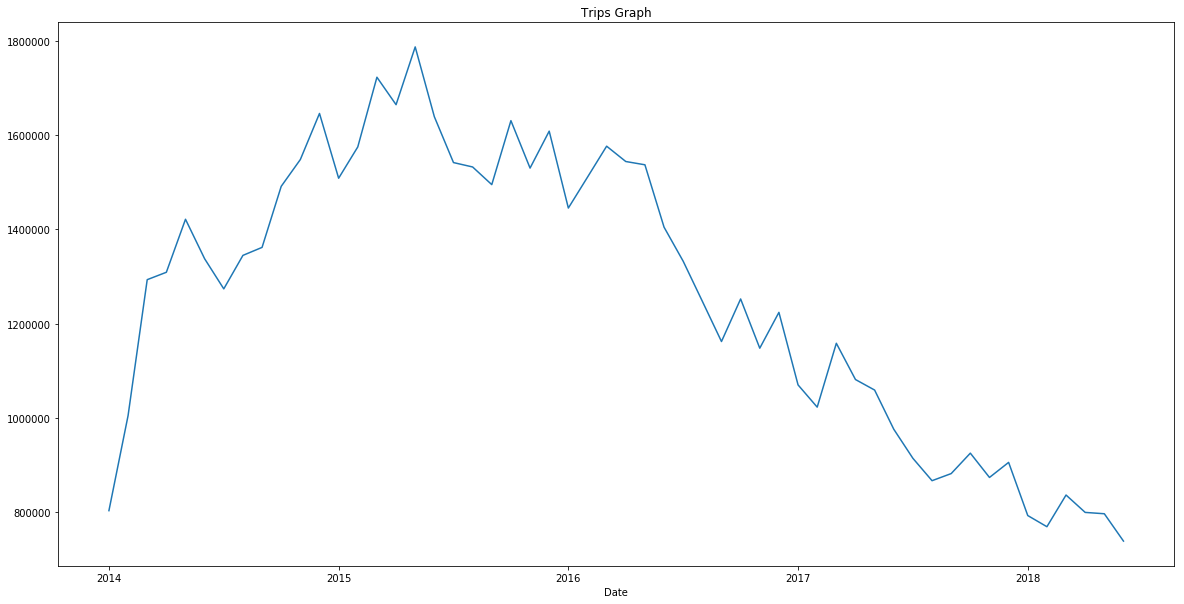

In [3]:
import matplotlib.pyplot as plt
ax1 = plt.subplots()

rides.set_index(['Date'],inplace=True)
ax1 = rides['Rides'].plot(figsize=(20,10))
plt.setp(ax1.xaxis.get_label(), visible=True, text='Date')
plt.setp(ax1.get_xticklabels(), visible=True)
plt.title('Trips Graph')
plt.minorticks_off()
#plt.xticks(range('06-2013','08-2018'))
plt.show()

<Figure size 432x288 with 0 Axes>

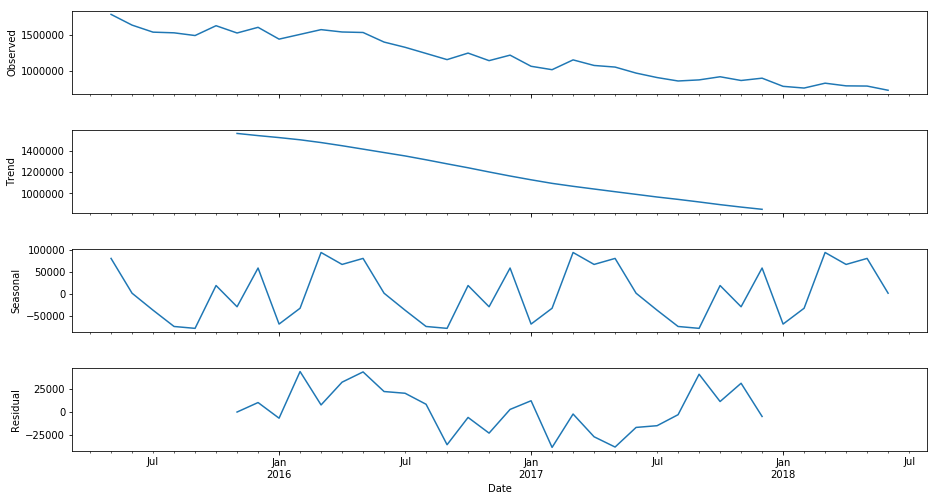

In [4]:
backup=rides
rides1=rides[rides.index >= '2015-05-01']
#ms1=ms1.set_index(pd.DatetimeIndex(ms1['month']))
decomposition = seasonal_decompose(rides1['Rides'],freq=12)  

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [6]:
rides_train = rides[(rides.index >= '2015-05-01') & (rides.index <= '2018-06-01')]

In [7]:
from sklearn.metrics import mean_squared_error
import itertools

from math import sqrt

results_df = pd.DataFrame(columns=['pdq', 'seasonal_pdq', 'aic', 'rmse'])

index_rad=0

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(rides1['Rides'],
                                            order=param,trend='n',
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            rides['forecast_rides'] = results.predict(start='2015-05-01',dynamic=True)  
            rmse = sqrt(mean_squared_error(rides['2015-05-01':]['Rides'], rides['2015-05-01':]['forecast_rides']))
            print('ARIMA{}x{}12 - AIC:{} - RMSE:{}'.format(param, param_seasonal, results.aic,rmse))
            results_df.loc[index_rad] = [param,param_seasonal,results.aic,rmse]
            index_rad = index_rad+1
        except:
            print('Is this failing??')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 1)12 - AIC:1144.1756597431918 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(0, 0, 1, 1)12 - AIC:1089.0620715126788 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(0, 1, 0, 1)12 - AIC:917.8543613531089 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(0, 1, 1, 1)12 - AIC:891.9227435513243 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(1, 0, 0, 1)12 - AIC:941.9030750654192 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(1, 0, 1, 1)12 - AIC:913.2189587503232 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(1, 1, 0, 1)12 - AIC:918.2048832947743 - RMSE:1239757.025789986
ARIMA(0, 0, 0)x(1, 1, 1, 1)12 - AIC:892.2611910444277 - RMSE:1239757.025789986
ARIMA(0, 0, 1)x(0, 0, 0, 1)12 - AIC:1089.0620715126788 - RMSE:1239757.025789986
ARIMA(0, 0, 1)x(0, 0, 1, 1)12 - AIC:1056.5856794331012 - RMSE:1239757.025789986
ARIMA(0, 0, 1)x(0, 1, 0, 1)12 - AIC:891.9227435513243 - RMSE:1239757.025789986
ARIMA(0, 0, 1)x(0, 1, 1, 1)12 - AIC:869.1191036361271 - RMSE:1239757.025789986
ARIMA(0, 0, 1)x(1, 0, 0, 1)12 - AIC:1079.0251404

In [9]:
results_df= results_df.sort_values('aic')
results_df.head(5)

,pdq,seasonal_pdq,aic,rmse
59,"(1, 1, 1)","(0, 1, 1, 1)",848.330907,1.239757e+06
31,"(0, 1, 1)","(1, 1, 1, 1)",849.904971,1.239757e+06
63,"(1, 1, 1)","(1, 1, 1, 1)",850.283372,1.239757e+06
27,"(0, 1, 1)","(0, 1, 1, 1)",850.549164,1.239757e+06
25,"(0, 1, 1)","(0, 0, 1, 1)",869.119104,1.239757e+06


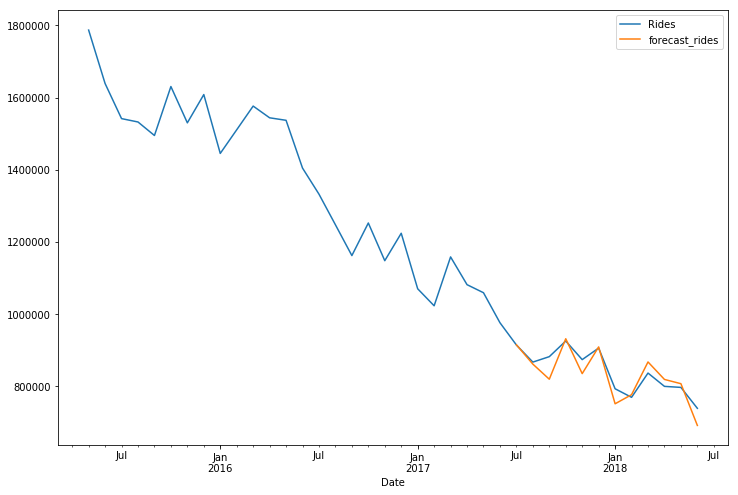

In [10]:
mod = sm.tsa.statespace.SARIMAX(rides_train['Rides'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

rides_train['forecast_rides'] = results.predict(start='2017-07-01',end='2018-06-01',dynamic=True)  

rides_train[['Rides', 'forecast_rides']].plot(figsize=(12, 8)) 

In [11]:
sqrt(mean_squared_error(rides_train['2017-07-01':]['Rides'], rides_train['2017-07-01':]['forecast_rides']))

30194.955331241283

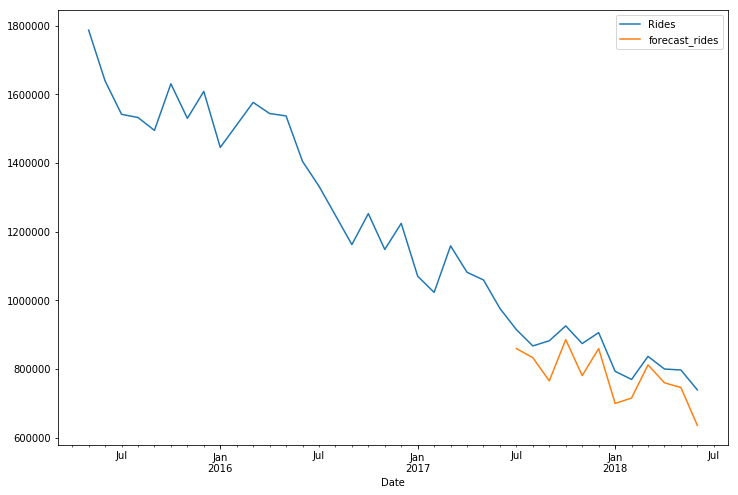

In [85]:
mod = sm.tsa.statespace.SARIMAX(rides_train['Rides'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

rides_train['forecast_rides'] = results.predict(start='2017-07-01',end='2018-06-01',dynamic=True)  

rides_train[['Rides', 'forecast_rides']].plot(figsize=(12, 8)) 

In [86]:
sqrt(mean_squared_error(rides_train['2017-07-01':]['Rides'], rides_train['2017-07-01':]['forecast_rides']))

69225.47257484685

In [12]:
results.predict(start='2018-07-01',end='2018-12-01',dynamic=True)  

2018-07-01    625043.958476
2018-08-01    583351.947644
2018-09-01    512479.991068
2018-10-01    599861.193600
2018-11-01    504853.702625
2018-12-01    571514.734212
Freq: MS, dtype: float64